In [409]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from datetime import datetime
import statistics as stat
from scipy.stats.stats import pearsonr

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

rcParams['figure.figsize'] = 6, 4
sb.set_style('whitegrid')


In [410]:
data = pd.read_csv('ml_house_data_set.csv')

## Initial data exploration

In [411]:
data.columns

Index(['year_built', 'stories', 'num_bedrooms', 'full_bathrooms',
       'half_bathrooms', 'livable_sqft', 'total_sqft', 'garage_type',
       'garage_sqft', 'carport_sqft', 'has_fireplace', 'has_pool',
       'has_central_heating', 'has_central_cooling', 'house_number',
       'street_name', 'unit_number', 'city', 'zip_code', 'sale_price'],
      dtype='object')

In [412]:
data.describe()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,house_number,unit_number,zip_code,sale_price
count,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,3088.000000,42703.000000,4.270300e+04
mean,1990.993209,1.365759,3.209283,1.923659,0.527153,1987.758986,2127.155446,455.849800,41.656324,18211.767347,2027.395402,11030.991476,4.135071e+05
std,19.199987,0.513602,1.043396,0.759699,0.499268,846.766270,922.807342,243.453463,168.715867,27457.109993,1141.383770,573.576228,3.185497e+05
min,1852.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,5.000000,-4.000000,0.000000,0.000000,3.000000,10004.000000,6.260000e+02
25%,1980.000000,1.000000,3.000000,1.000000,0.000000,1380.000000,1466.000000,412.000000,0.000000,674.000000,1063.000000,10537.000000,2.708990e+05
50%,1994.000000,1.000000,3.000000,2.000000,1.000000,1808.000000,1937.000000,464.000000,0.000000,4530.000000,2033.000000,11071.000000,3.780010e+05
75%,2005.000000,2.000000,4.000000,2.000000,1.000000,2486.000000,2640.000000,606.000000,0.000000,24844.500000,2921.000000,11510.000000,4.976970e+05
max,2017.000000,4.000000,31.000000,8.000000,1.000000,12406.000000,15449.000000,8318.000000,9200.000000,99971.000000,3998.000000,11989.000000,2.104200e+07


In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 20 columns):
year_built             42703 non-null int64
stories                42703 non-null int64
num_bedrooms           42703 non-null int64
full_bathrooms         42703 non-null int64
half_bathrooms         42703 non-null int64
livable_sqft           42703 non-null int64
total_sqft             42703 non-null int64
garage_type            42703 non-null object
garage_sqft            42703 non-null int64
carport_sqft           42703 non-null int64
has_fireplace          42703 non-null bool
has_pool               42703 non-null bool
has_central_heating    42703 non-null bool
has_central_cooling    42703 non-null bool
house_number           42703 non-null int64
street_name            42703 non-null object
unit_number            3088 non-null float64
city                   42703 non-null object
zip_code               42703 non-null int64
sale_price             42703 non-null float64
dtypes: b

## Number of houses built over time binned into categorical valuables

In [414]:
bins = np.linspace(1850,2018, num =11)  #create bins => np.linspace(min,max,numberOfBins)
data["Year_levels"] = pd.cut(data['year_built'],bins,labels= ['1850- 1866','1867-1883','1884-1900','1901-1917','1918-1934',
                                                              '1935-1950','1951-1967','1968-1984','1985-2001','2002-2018'])#divide dataset
data.groupby("Year_levels").size(), bins #show bin sises and bins

(Year_levels
 1850- 1866        1
 1867-1883         0
 1884-1900        18
 1901-1917       146
 1918-1934       358
 1935-1950       875
 1951-1967      3905
 1968-1984      7808
 1985-2001     12871
 2002-2018     16721
 dtype: int64,
 array([1850. , 1866.8, 1883.6, 1900.4, 1917.2, 1934. , 1950.8, 1967.6,
        1984.4, 2001.2, 2018. ]))

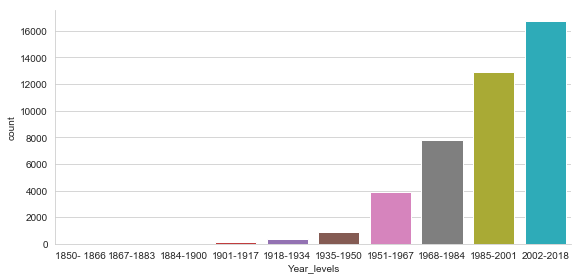

In [415]:
sb.catplot('Year_levels', order=['1850- 1866','1867-1883','1884-1900','1901-1917','1918-1934',
                            '1935-1950','1951-1967','1968-1984','1985-2001','2002-2018'], data= data, kind='count',
          height = 4, aspect =2)

## popularity of houses based on number of bedrooms

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

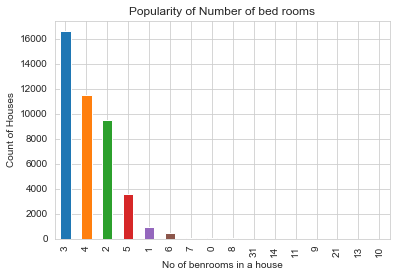

In [416]:
data['num_bedrooms'].value_counts().plot(kind = 'bar')
plt.title('Popularity of Number of bed rooms')
plt.xlabel("No of benrooms in a house")
plt.ylabel('Count of Houses')
sb.despine

## popularity of cities based on number of houses

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

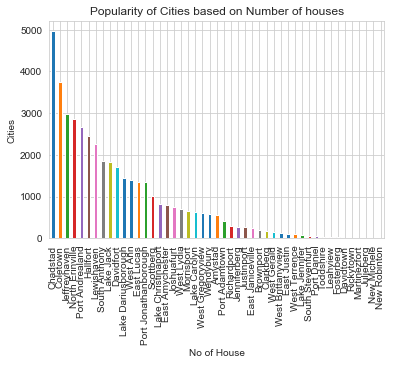

In [417]:
data['city'].value_counts().plot(kind = 'bar')
plt.title('Popularity of Cities based on Number of houses')
plt.xlabel("No of House")
plt.ylabel('Cities')
sb.despine

## How are other variables affecting the price. (Correlation between  sell price and other variables).

In [418]:
#correlation btwn year bilt and house
data['year_built'].corr(data['sale_price'])

0.22794759081530824

Text(0, 0.5, 'YEAR BUILT')

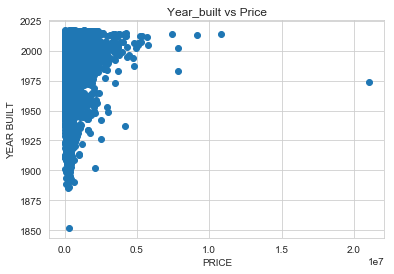

In [419]:
plt.scatter(data.sale_price,data.year_built)
plt.title('Year_built vs Price')
plt.xlabel('PRICE')
plt.ylabel('YEAR BUILT')

In [420]:
data['full_bathrooms'].corr(data['sale_price']) , min(data['full_bathrooms']), max(data['full_bathrooms'])

(0.4299470838750249, 0, 8)

Text(0, 0.5, 'BATH ROOMs')

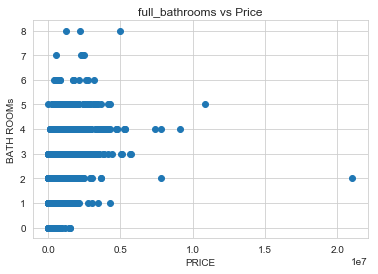

In [421]:
plt.scatter(data.sale_price,data.full_bathrooms)
plt.title('full_bathrooms vs Price')
plt.xlabel('PRICE')
plt.ylabel('BATH ROOMs')

In [422]:
data['total_sqft'].corr(data['sale_price']) , min(data['total_sqft']), max(data['total_sqft'])

(0.660714360656457, 5, 15449)

Text(0, 0.5, 'TOTAl SQRFT')

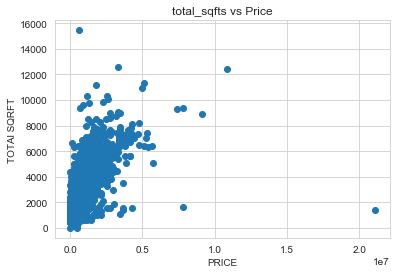

In [423]:
plt.scatter(data.sale_price,data.total_sqft)
plt.title('total_sqfts vs Price')
plt.xlabel('PRICE')
plt.ylabel('TOTAl SQRFT')

Text(0, 0.5, 'ZIPCODE')

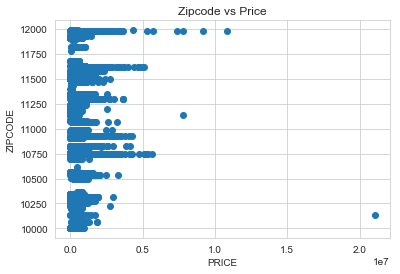

In [424]:
plt.scatter(data.sale_price,data.zip_code)
plt.title('Zipcode vs Price')
plt.xlabel('PRICE')
plt.ylabel('ZIPCODE')

In [425]:
data['half_bathrooms'].corr(data['sale_price']) , min(data['half_bathrooms']), max(data['half_bathrooms'])

(0.09427955265331577, 0, 1)

In [426]:
data['num_bedrooms'].corr(data['sale_price']) , min(data['num_bedrooms']), max(data['num_bedrooms'])

(0.31676780949485217, 0, 31)

Text(0, 0.5, 'num_bedrooms')

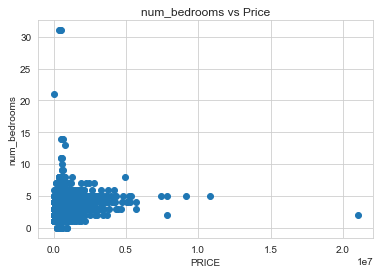

In [427]:
plt.scatter(data.sale_price,data.num_bedrooms)
plt.title('num_bedrooms vs Price')
plt.xlabel('PRICE')
plt.ylabel('num_bedrooms')

In [428]:
data['carport_sqft'].corr(data['sale_price']) , min(data['carport_sqft']), max(data['carport_sqft'])

(-0.19738418764808885, 0, 9200)

Text(0, 0.5, 'carport_sqft')

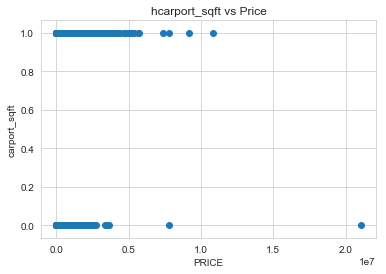

In [429]:
plt.scatter(data.sale_price,data.has_fireplace)
plt.title('hcarport_sqft vs Price')
plt.xlabel('PRICE')
plt.ylabel('carport_sqft')

In [430]:
data['has_fireplace'].corr(data['sale_price']) , min(data['has_fireplace']), max(data['has_fireplace'])

(0.2758127291498356, False, True)

Text(0, 0.5, 'has_fireplace')

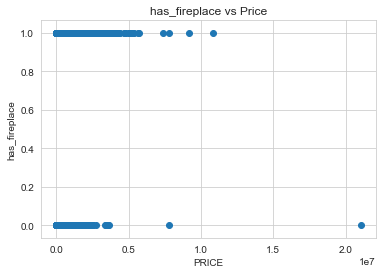

In [431]:
plt.scatter(data.sale_price,data.has_fireplace)
plt.title('has_fireplace vs Price')
plt.xlabel('PRICE')
plt.ylabel('has_fireplace')

In [432]:
data['has_pool'].corr(data['sale_price']) , min(data['has_pool']), max(data['has_pool'])

(0.35507253394823324, False, True)

Text(0, 0.5, 'has_pool')

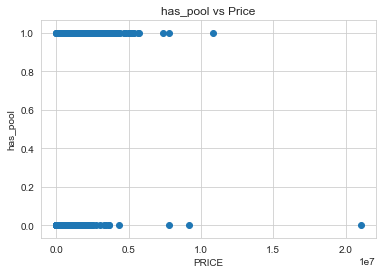

In [433]:
plt.scatter(data.sale_price,data.has_pool)
plt.title('has_pool vs Price')
plt.xlabel('PRICE')
plt.ylabel('has_pool')

Text(0, 0.5, 'has_pool')

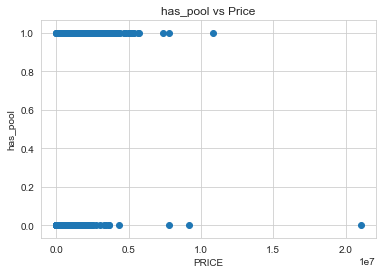

In [434]:
plt.scatter(data.sale_price,data.has_pool)
plt.title('has_pool vs Price')
plt.xlabel('PRICE')
plt.ylabel('has_pool')

In [435]:
data['has_central_heating'].corr(data['sale_price']) , min(data['has_central_heating']), max(data['has_central_heating'])

(0.11565834626498067, False, True)

In [436]:
data['has_central_cooling'].corr(data['sale_price']) , min(data['has_central_cooling']), max(data['has_central_cooling'])

(0.14212108008314198, False, True)

## Mnnnnn I got some negative values 

In [437]:
data['garage_sqft'].corr(data['sale_price']) , min(data['garage_sqft']), max(data['garage_sqft'])

(0.4489279955885494, -4, 8318)

Text(0, 0.5, 'garage_sqft')

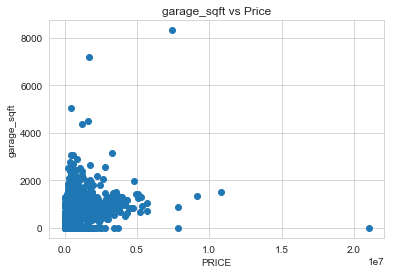

In [438]:
plt.scatter(data.sale_price,data.garage_sqft)
plt.title('garage_sqft vs Price')
plt.xlabel('PRICE')
plt.ylabel('garage_sqft')

In [439]:
data['livable_sqft'].corr(data['sale_price']) , min(data['livable_sqft']), max(data['livable_sqft'])

(0.6275083635084517, -3, 12406)

Text(0, 0.5, 'livable_sqft')

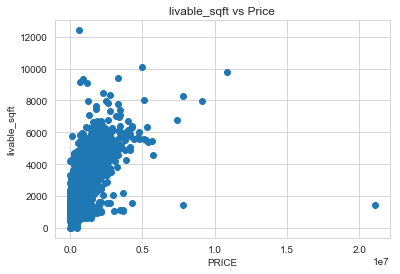

In [440]:
plt.scatter(data.sale_price,data.livable_sqft)
plt.title('livable_sqft vs Price')
plt.xlabel('PRICE')
plt.ylabel('livable_sqft')

In [441]:
len(data[data['garage_sqft']< 0]) # negative values 

52

In [442]:
data[data['livable_sqft']< 0]

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,...,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price,Year_levels
19780,2003,1,2,2,0,-2,269,none,0,0,...,False,True,False,6186,Schmidt Forge,3340.0,Jeffreyhaven,10346,71824.0,2002-2018
33192,1971,1,1,1,0,-3,5,none,0,0,...,False,True,False,1493,Johnson Ville,3581.0,Jeffreyhaven,10346,628.0,1968-1984
34817,1977,1,2,1,1,-2,6,attached,-3,0,...,False,True,True,399,Holland Valleys,NaN,Port Jonathanborough,10250,505261.0,1968-1984


In [443]:
oldyear = data[data['year_built'] < 2000].groupby('year_built').size()
oldyear.sort_values(ascending = False).head()

year_built
1989    1324
1988    1307
1990    1038
1987     947
1986     834
dtype: int64

In [444]:
year = data[data['year_built'] >= 2000].groupby('year_built').size()
year.head()

year_built
2000     859
2001    1017
2002    1233
2003    1589
2004    1914
dtype: int64

In [445]:
data.groupby('city').size().sort_values(ascending = False).head()

city
Chadstad           4962
Coletown           3739
Jeffreyhaven       2981
North Erinville    2868
Port Andrealand    2669
dtype: int64

## Data Wrangling
change garage type to 
### Replace categorical data with one-hot encoded data
data = pd.get_dummies(data, columns=['garage_type', 'city']


In [446]:
d = pd.get_dummies(data, columns=['garage_type', 'city'])
d.columns                      

Index(['year_built', 'stories', 'num_bedrooms', 'full_bathrooms',
       'half_bathrooms', 'livable_sqft', 'total_sqft', 'garage_sqft',
       'carport_sqft', 'has_fireplace', 'has_pool', 'has_central_heating',
       'has_central_cooling', 'house_number', 'street_name', 'unit_number',
       'zip_code', 'sale_price', 'Year_levels', 'garage_type_attached',
       'garage_type_detached', 'garage_type_none', 'city_Amystad',
       'city_Brownport', 'city_Chadstad', 'city_Clarkberg', 'city_Coletown',
       'city_Davidfort', 'city_Davidtown', 'city_East Amychester',
       'city_East Janiceville', 'city_East Justin', 'city_East Lucas',
       'city_Fosterberg', 'city_Hallfort', 'city_Jeffreyhaven',
       'city_Jenniferberg', 'city_Joshuafurt', 'city_Julieberg',
       'city_Justinport', 'city_Lake Carolyn', 'city_Lake Christinaport',
       'city_Lake Dariusborough', 'city_Lake Jack', 'city_Lake Jennifer',
       'city_Leahview', 'city_Lewishaven', 'city_Martinezfort',
       'city_Morri

In [447]:
d.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,has_fireplace,...,city_South Anthony,city_South Stevenfurt,city_Toddshire,city_Wendybury,city_West Ann,city_West Brittanyview,city_West Gerald,city_West Gregoryview,city_West Lydia,city_West Terrence
0,1978,1,4,1,1,1689,1859,508,0,True,...,0,0,0,0,0,0,0,0,0,0
1,1958,1,3,1,1,1984,2002,462,0,True,...,0,0,0,0,0,0,0,0,0,0
2,2002,1,3,2,0,1581,1578,0,625,False,...,0,0,0,0,0,0,0,0,0,0
3,2004,1,4,2,0,1829,2277,479,0,True,...,0,0,0,0,0,0,0,0,0,0
4,2006,1,4,2,0,1580,1749,430,0,True,...,0,0,0,0,0,0,0,0,0,0


In [448]:
data.groupby('zip_code').size().sort_values(ascending = False).head()

zip_code
10250    1931
11295    1796
11510    1616
10748    1397
11911    1359
dtype: int64

In [449]:
selected_zip_codes.groupby('has_pool').size(), selected_zip_codes.groupby('has_fireplace').size()

(has_pool
 False    6555
 True     1544
 dtype: int64, has_fireplace
 False    2387
 True     5712
 dtype: int64)

In [450]:
selected_zip_codes.groupby('has_central_heating').size(),selected_zip_codes.groupby('has_central_cooling').size()

(has_central_heating
 False     122
 True     7977
 dtype: int64, has_central_cooling
 False     174
 True     7925
 dtype: int64)

In [451]:
selected_zip_codes.groupby('stories').size()

stories
0       1
1    4152
2    3822
3     123
4       1
dtype: int64

In [452]:
selected_zip_codes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8099 entries, 24 to 42353
Data columns (total 21 columns):
year_built             8099 non-null int64
stories                8099 non-null int64
num_bedrooms           8099 non-null int64
full_bathrooms         8099 non-null int64
half_bathrooms         8099 non-null int64
livable_sqft           8099 non-null int64
total_sqft             8099 non-null int64
garage_type            8099 non-null object
garage_sqft            8099 non-null int64
carport_sqft           8099 non-null int64
has_fireplace          8099 non-null bool
has_pool               8099 non-null bool
has_central_heating    8099 non-null bool
has_central_cooling    8099 non-null bool
house_number           8099 non-null int64
street_name            8099 non-null object
unit_number            284 non-null float64
city                   8099 non-null object
zip_code               8099 non-null int64
sale_price             8099 non-null float64
Year_levels            8099 n

In [453]:
selected_zip_codes.iloc[2090]

year_built                     2005
stories                           1
num_bedrooms                      2
full_bathrooms                    2
half_bathrooms                    0
livable_sqft                   1563
total_sqft                     1810
garage_type                attached
garage_sqft                     235
carport_sqft                      0
has_fireplace                  True
has_pool                       True
has_central_heating            True
has_central_cooling            True
house_number                     59
street_name            Lewis Avenue
unit_number                     NaN
city                       West Ann
zip_code                      10748
sale_price                   377997
Year_levels               2002-2018
Name: 10408, dtype: object

In [454]:
selected_zip_codes[selected_zip_codes['sale_price']== 212313.0]

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,...,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price,Year_levels
2089,1946,1,2,1,0,833,1304,detached,865,477,...,False,False,False,77143,Hoover Ports,NaN,East Lucas,11911,212313.0,1935-1950


In [455]:
selected_zip_codes = data[data['zip_code'].isin ([10250,11295 ,11510,10748,11911])]
selected_zip_codes.shape

(8099, 21)

# BEST FIVE ZIPCODES

In [456]:
selected_zip_codes.to_csv('best_five_zipcodes.csv')
selected_zip_codes.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,...,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price,Year_levels
24,2007,1,2,2,0,1311,1694,detached,206,0,...,False,True,True,397,Cox Way,NaN,West Ann,10748,311217.0,2002-2018
25,2005,1,3,3,0,1703,2111,none,0,0,...,False,True,True,819,Chapman Crescent,NaN,West Ann,10748,434697.0,2002-2018
26,2000,2,2,3,0,1670,1830,none,0,0,...,False,True,True,313,Jacob Spring,NaN,West Ann,10748,1140298.0,1985-2001
28,2003,1,3,2,1,4078,5034,detached,925,0,...,True,True,True,967,Anthony Crest,NaN,West Ann,10748,1354501.0,2002-2018
29,1986,1,2,2,0,1390,1642,detached,466,0,...,False,True,True,155,Robin Passage,NaN,West Ann,10748,491401.0,1985-2001


In [457]:
#drop cols not needed
d_new = d.drop(columns=['house_number','street_name','unit_number','Year_levels'])

In [458]:
d_new.shape

(42703, 65)

In [459]:
one = d_new.loc[1]#gettting first row to try out the dot method(Patrick Idea)
scores= d_new.dot(one)

## THE ML MODEL

In [460]:
#call the regresson function and save in variable called reg
reg= LinearRegression()
#create x and y arrays
X = d_new.drop('sale_price',axis =1)
Y = d_new['sale_price']

In [461]:
#create Arrays for x and y
x = X.values
y = Y.values
y,x

(array([ 270897.,  302404., 2519996., ...,   98280.,   98278.,  186480.]),
 array([[1978, 1, 4, ..., 0, 0, 0],
        [1958, 1, 3, ..., 0, 0, 0],
        [2002, 1, 3, ..., 0, 0, 0],
        ...,
        [1983, 1, 1, ..., 0, 0, 0],
        [1981, 1, 3, ..., 0, 0, 0],
        [1980, 1, 3, ..., 0, 0, 0]], dtype=object))

In [462]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =.2, random_state = 0)

In [463]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [464]:
reg.score(X_test,y_test)

0.4355109831821843

In [465]:
# Save the trained model to a file so we can use it in other programs
joblib.dump(reg, 'reg_all_model.pkl')

# Find the error rate on the training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 47105.5453
Test Set Mean Absolute Error: 57759.6316


## MY model pridiction is very low so i have to use gradient Boasting

In [466]:
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

In [467]:
model2 = ensemble.GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=2,
    loss='ls'
)

In [468]:
model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber'
)

In [469]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=6,
             max_features=0.1, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [470]:
model2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [471]:
model.score(X_test ,y_test)

0.5490780822066466

In [472]:
model2.score(X_test ,y_test)

0.5349354822837007

In [473]:
# Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'trained_house_classifier_model.pkl')

# Find the error rate on the training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 47426.7932
Test Set Mean Absolute Error: 57373.4148


In [474]:
selected_zip_codes.head(1)

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,...,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price,Year_levels
24,2007,1,2,2,0,1311,1694,detached,206,0,...,False,True,True,397,Cox Way,NaN,West Ann,10748,311217.0,2002-2018


In [475]:
selected_zip_codes.head(1).values

array([[2007, 1, 2, 2, 0, 1311, 1694, 'detached', 206, 0, True, False,
        True, True, 397, 'Cox Way', nan, 'West Ann', 10748, 311217.0,
        '2002-2018']], dtype=object)

# KNN  Nearest Neighbor

In [476]:
import warnings
warnings.filterwarnings('ignore') # To ignore some of seaborn warning msg

from scipy import stats

from sklearn import linear_model # Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors

from math import log

In [477]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance') # initialize the model
knn.fit(X_train, y_train )# fit the train data
print ('test error (RMSE) is: %s' %mean_squared_error(y_test, 
                                                      knn.predict(X_test))**0.5) # predict price and test error

test error (RMSE) is: 280955.7038757917


In [478]:
knn.score

<bound method RegressorMixin.score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='distance')>

In [479]:
knn.score(X_test,y_test)

0.4621985498761814